In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
ratings = pd.read_csv('ml-latest-small/ratings.csv')
movies = pd.read_csv('ml-latest-small/movies.csv')
tags = pd.read_csv('ml-latest-small/tags.csv')

# display first 5 entries
n = 5
ratings.head(n)

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


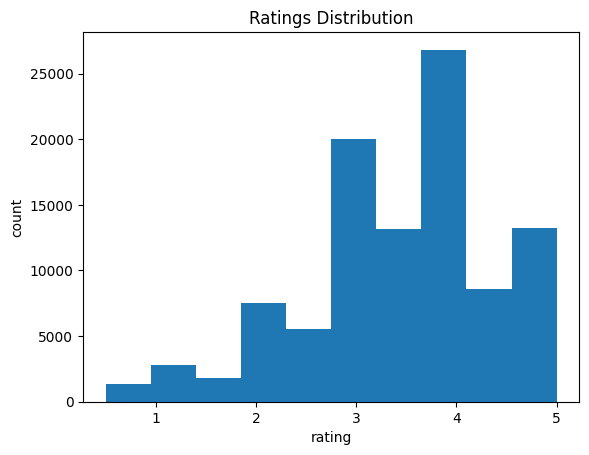

In [3]:
# plot ratings distribution

plt.title('Ratings Distribution')
plt.hist(ratings['rating'])
plt.xlabel('rating')
plt.ylabel('count')
plt.show()

In [48]:
# most rated movies

movies[movies['movieId'].isin(ratings['movieId'].value_counts().iloc[:n].index)]

,movieId,title,genres
257,296,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller
277,318,"Shawshank Redemption, The (1994)",Crime|Drama
314,356,Forrest Gump (1994),Comedy|Drama|Romance|War
510,593,"Silence of the Lambs, The (1991)",Crime|Horror|Thriller
1939,2571,"Matrix, The (1999)",Action|Sci-Fi|Thriller


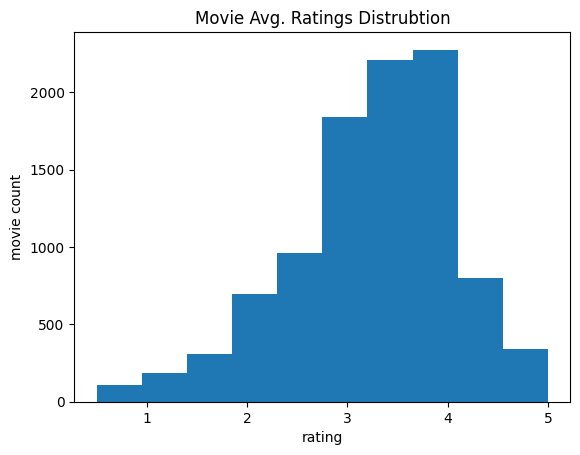

In [57]:
# plot movie rating distributions

plt.title('Movie Avg. Ratings Distrubtion')
plt.hist(ratings[['movieId', 'rating']].groupby('movieId').mean()['rating'])
plt.xlabel('rating')
plt.ylabel('movie count')
plt.show()

In [80]:
genres = np.unique(movies['genres'].apply(lambda s: s.split('|')).aggregate('sum'))
genres

array(['(no genres listed)', 'Action', 'Adventure', 'Animation',
       'Children', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy',
       'Film-Noir', 'Horror', 'IMAX', 'Musical', 'Mystery', 'Romance',
       'Sci-Fi', 'Thriller', 'War', 'Western'], dtype='<U18')

In [85]:
movies['genres'] = movies['genres'].apply(lambda s: s.split('|'))
movies

,movieId,title,genres
0,1,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]"
1,2,Jumanji (1995),"[Adventure, Children, Fantasy]"
2,3,Grumpier Old Men (1995),"[Comedy, Romance]"
3,4,Waiting to Exhale (1995),"[Comedy, Drama, Romance]"
4,5,Father of the Bride Part II (1995),[Comedy]
...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),"[Action, Animation, Comedy, Fantasy]"
9738,193583,No Game No Life: Zero (2017),"[Animation, Comedy, Fantasy]"
9739,193585,Flint (2017),[Drama]
9740,193587,Bungo Stray Dogs: Dead Apple (2018),"[Action, Animation]"


In [86]:
for genre in genres:
    if genre != '(no genres listed)':
        movies[f'is_{genre}'] = movies['genres'].apply(lambda l: 1 if genre in l else 0)

movies

,movieId,title,genres,is_Action,is_Adventure,is_Animation,is_Children,is_Comedy,is_Crime,is_Documentary,...,is_Film-Noir,is_Horror,is_IMAX,is_Musical,is_Mystery,is_Romance,is_Sci-Fi,is_Thriller,is_War,is_Western
0,1,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]",0,1,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,Jumanji (1995),"[Adventure, Children, Fantasy]",0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,Grumpier Old Men (1995),"[Comedy, Romance]",0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
3,4,Waiting to Exhale (1995),"[Comedy, Drama, Romance]",0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
4,5,Father of the Bride Part II (1995),[Comedy],0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),"[Action, Animation, Comedy, Fantasy]",1,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
9738,193583,No Game No Life: Zero (2017),"[Animation, Comedy, Fantasy]",0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
9739,193585,Flint (2017),[Drama],0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9740,193587,Bungo Stray Dogs: Dead Apple (2018),"[Action, Animation]",1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


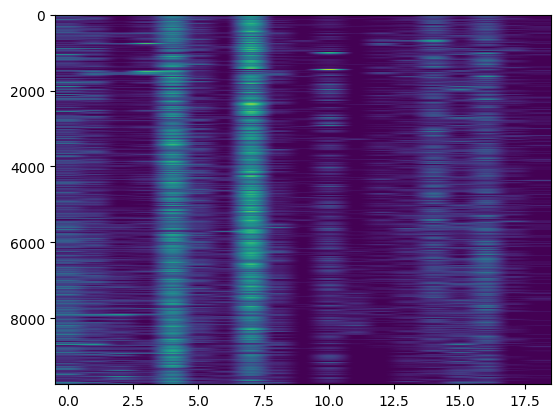

In [97]:
movie_genre = np.array(movies[[f'is_{genre}' for genre in genres[1:]]])
plt.imshow(movie_genre, aspect='auto')
plt.show()

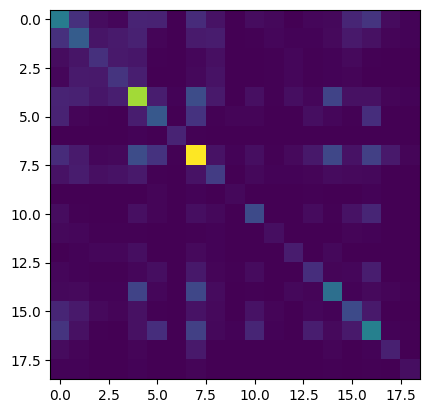

In [118]:
genre_genre = (movie_genre.T @ movie_genre).astype('float')

plt.imshow(genre_genre)
plt.show()

In [160]:
def user_user_sim(uid1, uid2):
    user_user = ratings[ratings['userId'] == uid1].join(ratings[ratings['userId'] == uid2], 'movieId', 'inner', '_l', '_r')

    user_user['rating_r'] -= 2.5
    user_user['rating_l'] -= 2.5

    u = np.array(user_user['rating_l'])
    u /= np.linalg.norm(u)
    v = np.array(user_user['rating_r'])
    v /= np.linalg.norm(v)

    return u@v

user_user_sim(1, 20)

0.24243661069253053

In [183]:
def user_movie_score(user_id, movie_id):
    movie_ratings = ratings[ratings['movieId'] == movie_id]
    return (movie_ratings['userId'].apply(lambda uid: user_user_sim(user_id, uid))*movie_ratings['rating']).mean()

user_movie_score(10, 20)

/var/folders/13/swxfhzrn1qs95n9cp967bvww0000gn/T/ipykernel_35170/3671558999.py:8: RuntimeWarning: invalid value encountered in divide
  u /= np.linalg.norm(u)


-0.1556659743222546